#Binary

TensorFlow version: 2.15.0
11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.0227 - val_accuracy: 0.9940
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0195 - val_accuracy: 0.9948
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0168 - val_accuracy: 0.9955
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0146 - val_accuracy: 0.9963
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0141 - val_accuracy: 0.9961
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 7/10
1875/1875 [====================

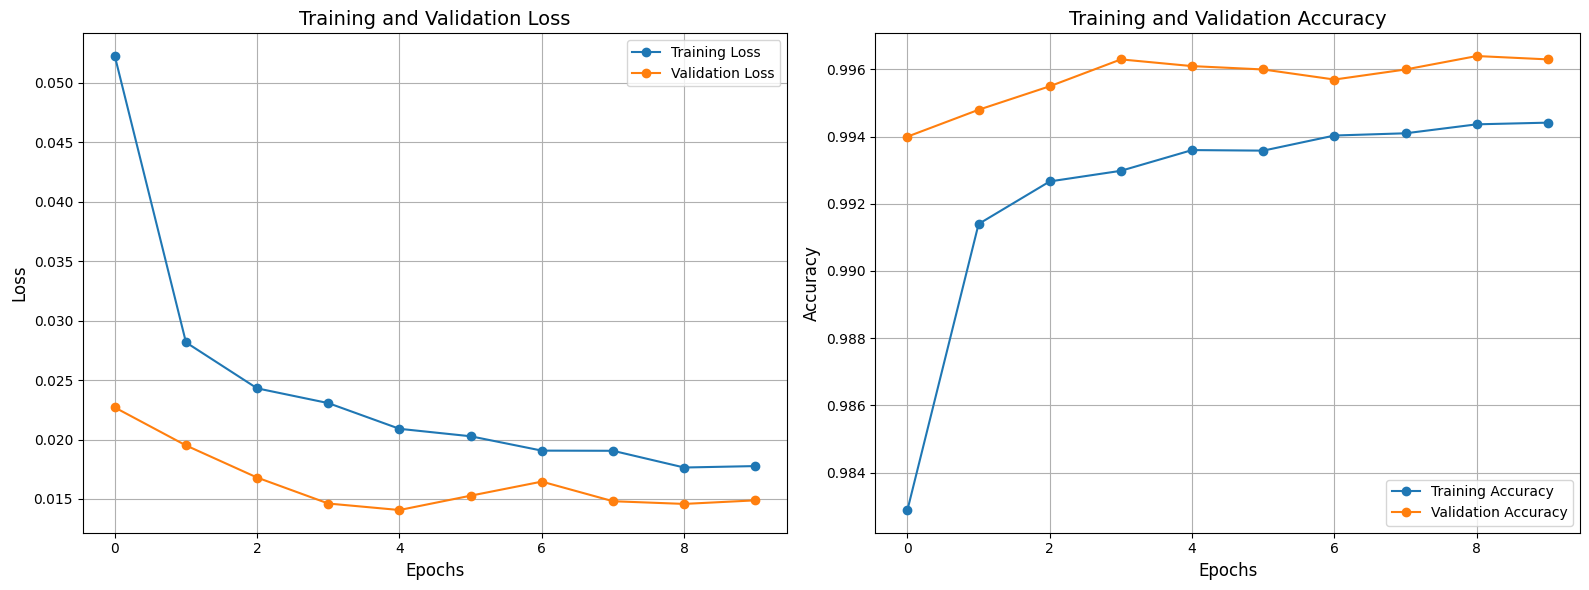

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to binary: 1 if the digit is '1', otherwise 0
y_train = (y_train == 1).astype(int)
y_test = (y_test == 1).astype(int)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
model.evaluate(x_test, y_test, verbose=2)

# Create a probability model for predictions
probability_model = tf.keras.Sequential([
    model
])

# Get predictions for the first 5 test images
predictions = probability_model(x_test[:5]).numpy()
print(predictions)

plt.figure(figsize=(16, 6))  # Adjust the width and height as needed

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Standaard

TensorFlow version: 2.15.0
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9762 - accuracy: 0.6727 - val_loss: 0.3476 - val_accuracy: 0.9163
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6387 - accuracy: 0.7994 - val_loss: 0.2835 - val_accuracy: 0.9297
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5698 - accuracy: 0.8233 - val_loss: 0.2488 - val_accuracy: 0.9344
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5288 - accuracy: 0.8384 - val_loss: 0.2254 - val_accuracy: 0.9423
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4944 - accuracy: 0.8518 - val_loss: 0.2167 - val_accuracy: 0.9458
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4777 - accuracy: 0.8579 - val_loss: 0.2217 - val_accuracy: 0.9462
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4588 - accuracy: 0.8640 - val_l

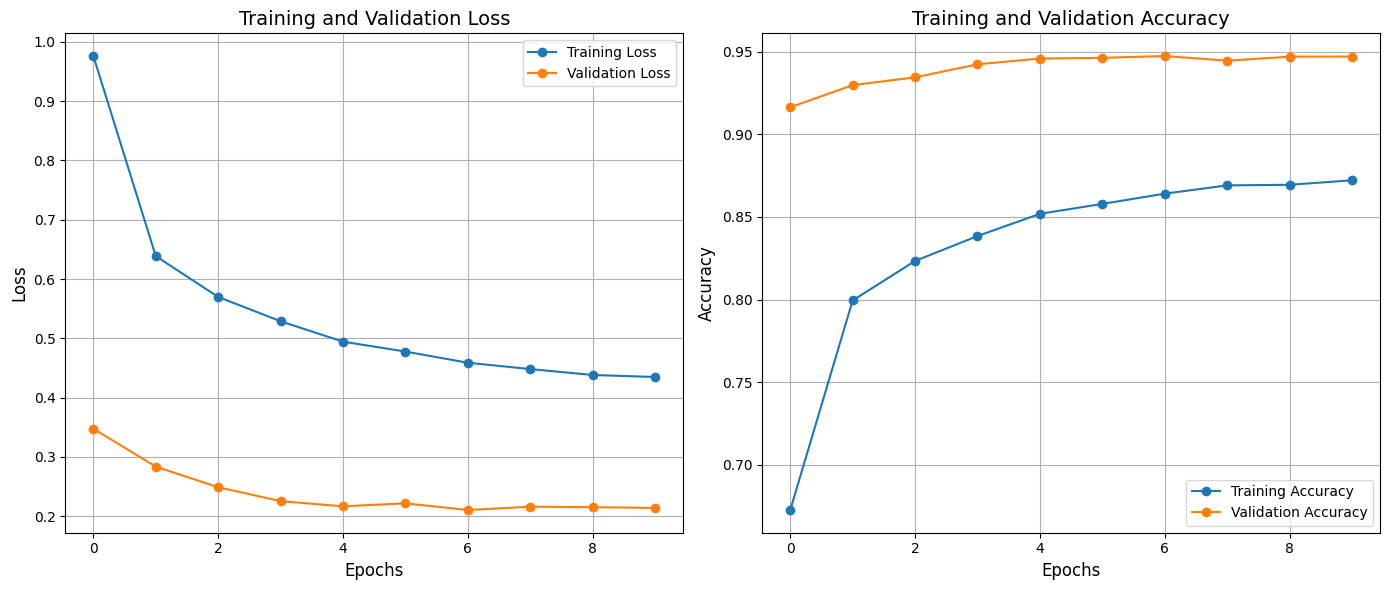

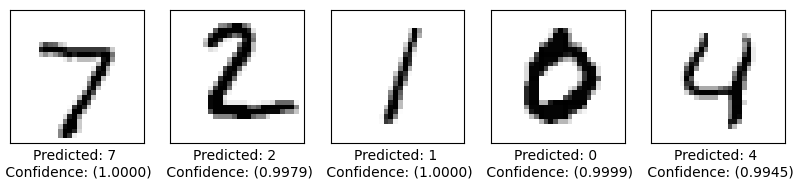

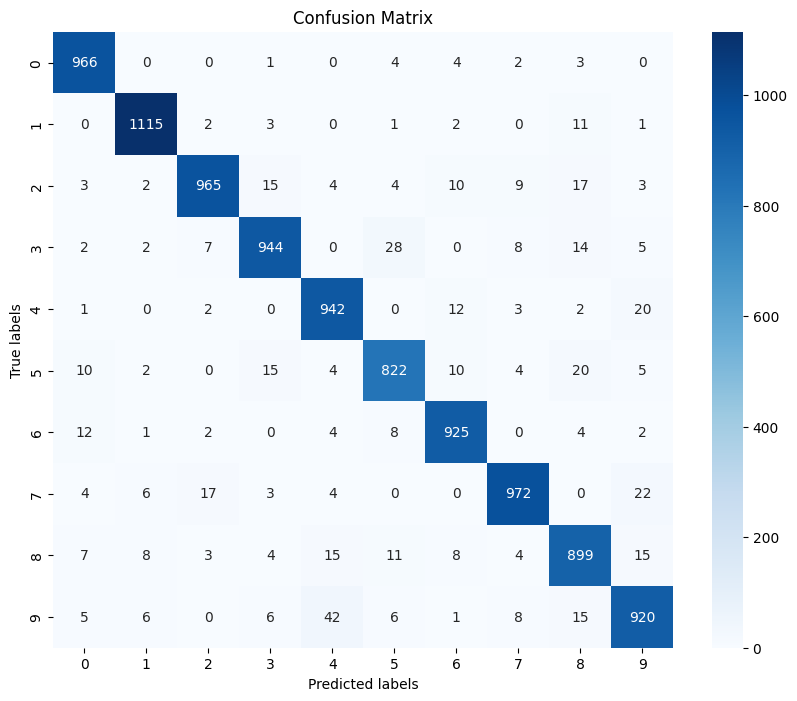

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define your model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test data
model.evaluate(x_test, y_test, verbose=2)

# Create a probability model with softmax layer
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

# Enhanced plot for training and validation loss and accuracy
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Adjust startPoint to change confidence images
startPoint = 0

# Predict probabilities on test data
predictions = probability_model(x_test[startPoint:startPoint + 5])
matrix_predictions = probability_model(x_test)

# Plot the test images with their predicted labels and probabilities
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[startPoint + i], cmap=plt.cm.binary)  # Adjust index to show the selected images
    plt.xticks([])
    plt.yticks([])
    predicted_label = tf.argmax(predictions[i]).numpy()
    confidence = predictions[i][predicted_label].numpy()  # Convert to numpy if it's a tensor
    plt.xlabel(f'Predicted: {predicted_label} \n Confidence: ({confidence:.4f})')
plt.show()

# Example of how to compute precision, recall, F1-score using sklearn
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tf.argmax(matrix_predictions, axis=1).numpy()

# Confusion Matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()